C:\Users\lenovo\Anaconda python\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


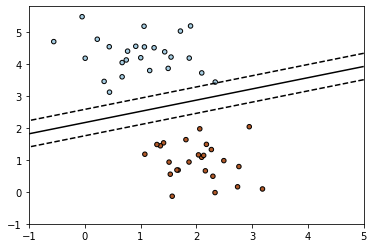

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs
 
# creamos 60 puntos separables
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
 
# ajusta el modelo
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, Y)
 
# trazar la línea, los puntos y los vectores más cercanos al plano
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)
 
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
  x1 = val
  x2 = X2[i, j]
  p = clf.decision_function([[x1, x2]])
  Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
edgecolor='black', s=20)
 
plt.axis('tight')
plt.show()